In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
#build the vocab of chars and mapping to/from integers - similar to previous part
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)} 
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()} 
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
#build dataset - again similar to previous part
block_size = 3 #context length: how many characters do we take to predict the next one
X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] #crop and append
        
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [7]:
C = torch.randn((27,2)) #look up vector for 27 characters

In [8]:
emb = C[X] #indexing
emb.shape

torch.Size([32, 3, 2])

In [9]:
W1 = torch.randn((6,100))
b1 = torch.rand(100)

In [10]:
#emb @ W1 + b1 #this will error out due to incompatible sizing of tensors

In [11]:
torch.cat([emb[:, 0, :],emb[:, 1, :],emb[:, 2, :]], 1).shape #contat to shape to allow matrix multiple

torch.Size([32, 6])

In [12]:
torch.cat(torch.unbind(emb, 1), 1).shape #shorter form of above

torch.Size([32, 6])

In [13]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [14]:
a.view(3, 3, 2) #tensors can be manipulated to change its attributes to modify its shape

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [15]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1) #view is creating similar modification on the tensor

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [16]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) #-1 is for infer shape

In [17]:
h

tensor([[ 0.6401, -0.0564,  0.6798,  ...,  0.4391, -0.3324,  0.6172],
        [ 0.5402,  0.4074,  0.6069,  ...,  0.4160, -0.1777,  0.2192],
        [ 0.5708,  0.6460, -0.6557,  ..., -0.1715, -0.3268,  0.2084],
        ...,
        [-0.9977,  0.5862,  0.9870,  ...,  0.9924,  0.9731, -0.9654],
        [ 0.9993,  0.9998,  0.0411,  ..., -0.8142,  0.8744, -0.9995],
        [-0.9400, -0.9994,  0.4895,  ...,  0.8523, -0.8290,  0.9834]])

In [18]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [19]:
logits = h @ W2 + b2

In [20]:
logits.shape

torch.Size([32, 27])

In [21]:
counts = logits.exp()

In [22]:
prob = counts / counts.sum(1, keepdims=True)

In [23]:
prob

tensor([[3.3510e-02, 6.8777e-08, 6.8296e-02, 1.1858e-05, 5.6504e-07, 5.1459e-06,
         7.7035e-03, 1.0659e-03, 5.0601e-07, 9.9172e-04, 1.0435e-03, 1.4237e-05,
         5.8764e-05, 1.5095e-05, 5.6829e-08, 7.0018e-08, 1.6601e-06, 1.3583e-03,
         9.7908e-09, 5.5067e-07, 6.9926e-04, 5.6021e-04, 7.2407e-04, 8.8258e-01,
         1.3491e-03, 2.3761e-06, 2.1507e-06],
        [1.0191e-02, 2.0241e-07, 8.5150e-01, 3.6941e-05, 3.4532e-06, 1.3217e-05,
         4.6868e-02, 8.1234e-06, 7.1466e-06, 1.9356e-04, 5.4147e-04, 9.3149e-04,
         4.8977e-04, 2.1497e-05, 1.6805e-06, 5.6703e-08, 7.5631e-06, 2.2436e-02,
         8.6265e-08, 2.3514e-05, 1.2146e-02, 3.2472e-03, 1.0419e-03, 4.9657e-02,
         6.2753e-04, 1.0934e-06, 5.8303e-06],
        [3.0786e-05, 1.9814e-04, 5.1190e-01, 2.4968e-03, 9.1766e-04, 4.7951e-04,
         1.8886e-02, 3.2958e-05, 4.3559e-05, 9.8834e-07, 5.4438e-05, 2.5841e-01,
         1.4284e-03, 1.1453e-03, 8.1437e-06, 1.5065e-06, 3.8312e-02, 8.5939e-05,
         5.0103e-

In [24]:
prob[1].sum()

tensor(1.0000)

In [25]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(13.4960)

In [26]:
#wrap it all up - made respectable as AK says

In [27]:
X.shape, Y.shape #dataset

(torch.Size([32, 3]), torch.Size([32]))

In [28]:
g = torch.Generator().manual_seed(2147483647) #deterministic reproducibility
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [29]:
sum(p.nelement() for p in parameters) #number of parameters in total

3481

In [30]:
emb = C[X] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) #(32,100)
logits = h @ W2 + b2 #(32, 27)
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.7697)

In [33]:
F.cross_entropy(logits, Y) #do not have to reinvent the wheel - use this pytorch function, also more efficient

tensor(17.7697)

In [38]:
for p in parameters:
    p.requires_grad = True

In [44]:
#so rewrite the whole

for _ in range(1000):
    
    #forward pass
    emb = C[X] #(32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 #(32, 27)
    loss = F.cross_entropy(logits, Y)
    
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad #0.1 is the learning rate
        
print(loss.item()) #loss cannot be zero because for example the first letter can be any of 4 different characters

0.2533818781375885


In [46]:
#lets use the full data set - all words

#build dataset (modified from line 5)
block_size = 3 #context length: how many characters do we take to predict the next one
X, Y = [], []

for w in words: #all words
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] #crop and append
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [47]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [88]:
g = torch.Generator().manual_seed(2147483647) #deterministic reproducibility
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [51]:
for _ in range(10):
    
    #forward pass
    emb = C[X] #(32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 #(32, 27)
    loss = F.cross_entropy(logits, Y)
    
    print(loss.item()) 
    
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad #0.1 is the learning rate
        
#this is quite slow to process all data

10.709585189819336
10.407631874084473
10.127808570861816
9.864365577697754
9.61450481414795
9.376440048217773
9.148945808410645
8.931112289428711
8.722232818603516
8.521750450134277


In [56]:
torch.randint(0, X.shape[0], (32,)) #mini batch to 32 example to speed up the gradient

tensor([ 35401, 123538, 113057,  31001, 222935,  32522, 201585, 195435,  28601,
         44262, 191495,  53145, 167107, 160922,  93800,  69679, 223950, 156579,
         69265,  72523,  18463,  83066, 176212, 177683,  86060,  33194, 169628,
         89922, 223472, 184345, 126830,  53395])

In [91]:
for _ in range(10):
    
    #minibatch
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]] #(32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 #(32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad #0.1 is the learning rate
        
#this is quite faster to process a small batch of data, but gradient quality is lower

10.20844554901123
10.00599193572998
9.1476411819458
6.979681015014648
5.82944917678833
6.272492408752441
7.054762363433838
7.6651530265808105
5.435883522033691
6.571828842163086


In [76]:
emb = C[X] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) #(32,100)
logits = h @ W2 + b2 #(32, 27)
loss = F.cross_entropy(logits, Y)
loss #to see the loss over the entire data set

tensor(2.4934, grad_fn=<NllLossBackward0>)

In [95]:
#find the optimised learning rate
lre = torch.linspace(-3, 0, 1000) #by experimenting we think the best learning rate is between 0.001 and 1
lrs = 10**lre
lrs #candidate learning rates

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [99]:
#reset
g = torch.Generator().manual_seed(2147483647) #deterministic reproducibility
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [101]:
#record the learning rate and associated loss
lri = []
lossi = []

for i in range(1000):
    
    #minibatch
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]] #(32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 #(32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad #0.1 is the learning rate
        
    #track stats
    lri.append(lre[i])
    lossi.append(loss.item())
        
#this is quite faster to process a small batch of data, but gradient quality is lower

22.446693420410156
21.870466232299805
19.23129653930664
21.01145362854004
20.493684768676758
18.563657760620117
19.680105209350586
18.38384437561035
18.061674118041992
18.52784538269043
22.302330017089844
18.493244171142578
20.308799743652344
21.491365432739258
19.86318016052246
20.610309600830078
16.064411163330078
21.168128967285156
18.6347713470459
20.610397338867188
17.2509822845459
17.898956298828125
20.621658325195312
16.99456787109375
16.685226440429688
18.25238609313965
19.861066818237305
17.731122970581055
17.05359649658203
18.565977096557617
18.164857864379883
17.92374610900879
20.522872924804688
20.188549041748047
18.968835830688477
17.669160842895508
19.156179428100586
15.995415687561035
17.411895751953125
19.964136123657227
15.471169471740723
16.233354568481445
19.7154483795166
17.890228271484375
19.776273727416992
18.540328979492188
18.55756378173828
19.90874481201172
18.091506958007812
21.267316818237305
23.97449493408203
17.49943733215332
15.049753189086914
16.991392135

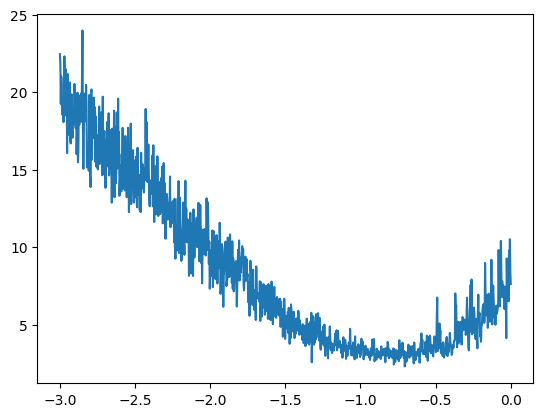

In [103]:
plt.plot(lri, lossi) #the plot shows that exp(-1.0) which is 0.1 seems to be a good learning rate

In [104]:
#now we can use the optimised learning rate on the mini batch for a long time to train the NN

In [109]:
#reset
g = torch.Generator().manual_seed(2147483647) #deterministic reproducibility
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [120]:
for i in range(10000):
    
    #minibatch
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]] #(32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 #(32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 0.01 #start from 0.1 and learning-rate decay to 0.01 for after 3-4 runs
    for p in parameters:
        p.data += -lr * p.grad #0.1 is the learning rate
        
emb = C[X] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) #(32,100)
logits = h @ W2 + b2 #(32, 27)
loss = F.cross_entropy(logits, Y)
loss #to see the loss over the entire data set, result lower loss than biagram where loss>2.4

tensor(2.3118, grad_fn=<NllLossBackward0>)

In [121]:
# training split, dev/validation split, test split
# 80%, 10%, 10%
# minute mark 56m:29s